# 39AA Project Part 2
[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/glaframb71/CS39AA-Project/blob/main/39aa-project.ipynb)


<font size=3>Welcome to Part 2 of my 39AA Project! In this notebook, we will be taking the dataset that was explored in Part 1 and trying to complete our task of predicting an athlete's football position based on their height, weight, and college. Let's get started by importing a few packages we will use in this notebook.</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

<font size='3'>Now lets import the players data from the project GitHub.</font>

In [2]:
playersDataUrl = "https://raw.githubusercontent.com/glaframb71/CS39AA-Project/main/data/players.csv"
playersData = pd.read_csv(playersDataUrl)

playersData.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan


<font size='3'>Great! The only thing missing from the DataFrame is a column that converts the 'height' column, which currently represents player heights in feet as strings, into a 'height_inches' column that represents player heights in inches as ints.</font>

In [3]:
# First we will add in the height_inches column to playersData and slot it next to the height column.
playersData = playersData.copy()
playersData.loc[:, 'height_inches'] = playersData['height'].apply(lambda x: int(x.split('-')[0]) * 12 + int(x.split('-')[1]))
height_index = playersData.columns.get_loc('height')
playersData.insert(height_index + 1, "height_inches", playersData.pop("height_inches"))

playersData.head()

,nflId,height,height_inches,weight,birthDate,collegeName,position,displayName
0,25511,6-4,76,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,76,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,74,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,78,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,76,217,1985-05-17,Boston College,QB,Matt Ryan


<font size='3'>Now that the 'height_inches' column has been made, lets clean up the DataFrame to hold only the columns that are relevant to the task we are looking to accomplish. As a refresher, these columns will be 'height_inches', 'weight', 'collegeName', and 'position'.</font>

In [4]:
players = playersData[['height_inches', 'weight','collegeName', 'position']]

players.head()

,height_inches,weight,collegeName,position
0,76,225,Michigan,QB
1,76,328,Arkansas,T
2,74,225,California,QB
3,78,267,UCLA,TE
4,76,217,Boston College,QB


<font size='3'>Now that we have the players data that was explored in Part 1, we can recall that there was 2 positons that showed up only once in the data. These poisitions were 'DB' and 'LS'. I want to drop these two positions since there isn't very much data to represent these positions. We can do that with the following code.</font>

In [5]:
print('Players shape before filter:')
print(players.shape)
positions_to_drop = ['DB', 'LS']
filtered_players = players[~players['position'].isin(positions_to_drop)]
print('Players shape after filter:')
print(filtered_players.shape)

Players shape before filter:
(1683, 4)
Players shape after filter:
(1681, 4)


<font size='3'>We now have our DataFrame holding the relevant information that is needed. Let's split up our data into X and y training and validation sets using the method **train_test_split** imported from sklearn.model_selection.</font>

In [6]:
X = filtered_players.drop('position', axis=1)
y = filtered_players['position']


In [7]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)

# Keep a copy of the unencoded validation set
X_val_raw = X_val.copy()

# Perform one-hot encoding on the training set
X_train_encoded = pd.get_dummies(X_train, columns=['collegeName'])

# Get the encoded column names from the training set
encoded_columns = X_train_encoded.columns

# Perform one-hot encoding on the validation set
X_val_encoded = pd.get_dummies(X_val, columns=['collegeName'])

missing_cols = set(X_train_encoded.columns) - set(X_val_encoded.columns)

# Create a DataFrame of zeros for the missing columns
missing_cols_df = pd.DataFrame(0, index=X_val_encoded.index, columns=list(missing_cols))

# Concatenate the original DataFrame with the DataFrame of missing columns
X_val_encoded = pd.concat([X_val_encoded, missing_cols_df], axis=1)

# Ensure the order of column in the validation set is the same as in training set
X_val_encoded = X_val_encoded[encoded_columns]


In [8]:
smote = SMOTE(sampling_strategy='not majority', k_neighbors=1) # or any number less than 5
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)

<font size='3'>Sweet! We have split our dataset into training and validation sets. Now, to make our data more compatible with machine learning algorithms, let's convert the 'collegeName' column in our X taining and validation sets into a numerical format using one-hot encoding.</font>

Training Log Loss (n_estimators=25): 0.3139
Validation Log Loss (n_estimators=25): 7.9734
Training Log Loss (n_estimators=50): 0.3133
Validation Log Loss (n_estimators=50): 6.7132
Training Log Loss (n_estimators=75): 0.3120
Validation Log Loss (n_estimators=75): 6.0666
Training Log Loss (n_estimators=100): 0.3122
Validation Log Loss (n_estimators=100): 5.8846
Training Log Loss (n_estimators=200): 0.3112
Validation Log Loss (n_estimators=200): 5.4481
Training Log Loss (n_estimators=300): 0.3111
Validation Log Loss (n_estimators=300): 4.9106
Training Log Loss (n_estimators=400): 0.3114
Validation Log Loss (n_estimators=400): 4.8140
Training Log Loss (n_estimators=500): 0.3112
Validation Log Loss (n_estimators=500): 4.6469
Training Log Loss (n_estimators=600): 0.3109
Validation Log Loss (n_estimators=600): 4.6470


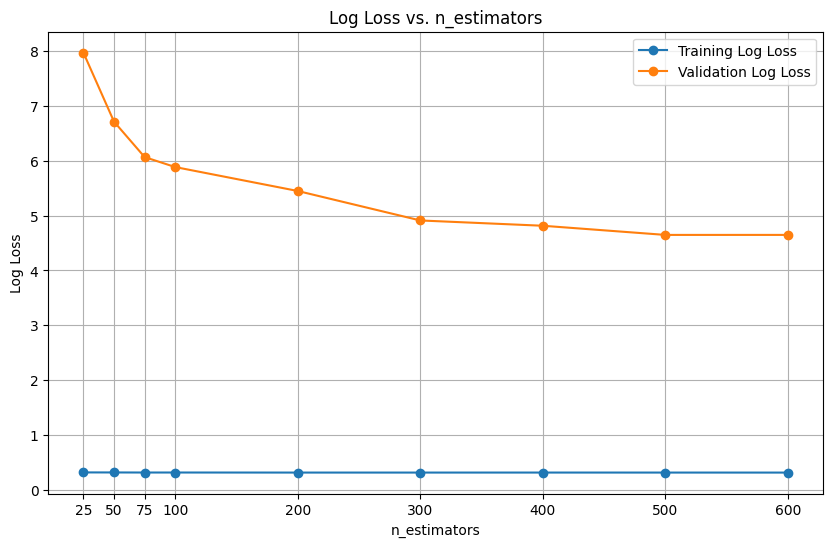

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt

# Define a range of n_estimators values to test
n_estimators_values = [25, 50, 75, 100, 200, 300, 400, 500, 600]

# Initialize lists to store log losses
train_log_losses = []
val_log_losses = []

# Iterate over the n_estimators values
for n in n_estimators_values:
    # Create and train the RandomForest model
    model_rf = RandomForestClassifier(n_estimators=n, max_depth=None, random_state=42)
    model_rf.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the training data
    predictions_train_rf_proba = model_rf.predict_proba(X_train_resampled)
    # Calculate training log loss
    train_log_loss = log_loss(y_train_resampled, predictions_train_rf_proba)
    train_log_losses.append(train_log_loss)

    # Make predictions on the validation data
    predictions_val_rf_proba = model_rf.predict_proba(X_val_encoded)
    # Calculate validation log loss
    val_log_loss = log_loss(y_val, predictions_val_rf_proba)
    val_log_losses.append(val_log_loss)

    print(f"Training Log Loss (n_estimators={n}): {train_log_loss:.4f}")
    print(f"Validation Log Loss (n_estimators={n}): {val_log_loss:.4f}")

# Plot the log losses for different n_estimators values
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_log_losses, marker='o', label='Training Log Loss')
plt.plot(n_estimators_values, val_log_losses, marker='o', label='Validation Log Loss')
plt.title('Log Loss vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.xticks(n_estimators_values)
plt.grid(True)
plt.legend()
plt.show()


Training Accuracy (n_estimators=25): 0.9139
Validation Accuracy (n_estimators=25): 0.3175
Training Accuracy (n_estimators=50): 0.9153
Validation Accuracy (n_estimators=50): 0.3294
Training Accuracy (n_estimators=100): 0.9156
Validation Accuracy (n_estimators=100): 0.3264
Training Accuracy (n_estimators=200): 0.9156
Validation Accuracy (n_estimators=200): 0.3323
Training Accuracy (n_estimators=300): 0.9156
Validation Accuracy (n_estimators=300): 0.3353


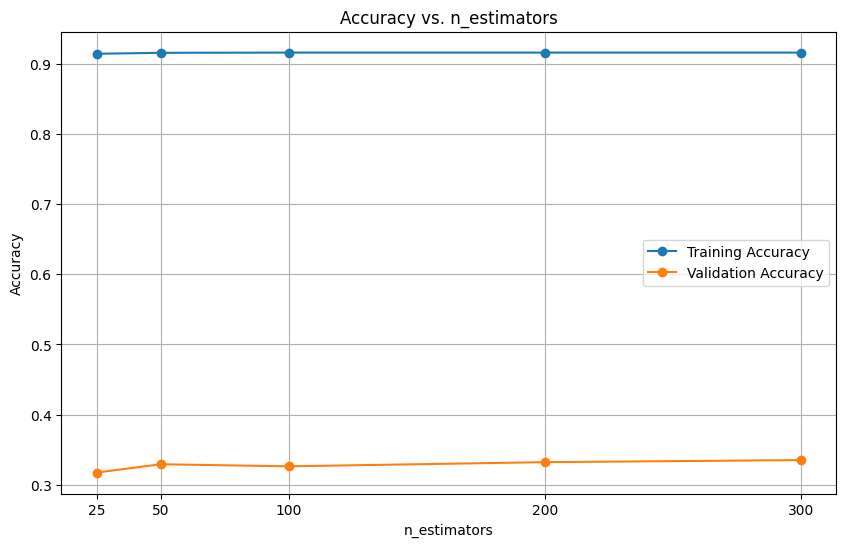

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Define a range of n_estimators values to test
n_estimators_values = [25, 50, 100, 200, 300]

# Initialize lists to store accuracies
train_accuracies = []
val_accuracies = []

# Iterate over the n_estimators values
for n in n_estimators_values:
    # Create and train the RandomForest model
    model_rf = RandomForestClassifier(n_estimators=n, max_depth=None, random_state=42)
    model_rf.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the training data
    predictions_train_rf = model_rf.predict(X_train_resampled)
    # Calculate training accuracy
    train_accuracy = accuracy_score(y_train_resampled, predictions_train_rf)
    train_accuracies.append(train_accuracy)

    # Make predictions on the validation data
    predictions_val_rf = model_rf.predict(X_val_encoded)
    # Calculate validation accuracy
    val_accuracy = accuracy_score(y_val, predictions_val_rf)
    val_accuracies.append(val_accuracy)

    print(f"Training Accuracy (n_estimators={n}): {train_accuracy:.4f}")
    print(f"Validation Accuracy (n_estimators={n}): {val_accuracy:.4f}")

# Plot the accuracies for different n_estimators values
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(n_estimators_values, val_accuracies, marker='o', label='Validation Accuracy')
plt.title('Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.xticks(n_estimators_values)
plt.grid(True)
plt.legend()
plt.show()
